In [1]:
import PySimpleGUI as sg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
def read_table():

    sg.set_options(auto_size_buttons=True)
    filename = sg.popup_get_file(
        'Dataset to read',
        title='Dataset to read',
        no_window=True, 
        file_types=(("CSV Files", "*.csv"),("Text Files", "*.txt")))
    # --- populate table with file contents --- #
    if filename == '':
        return

    data = []
    header_list = []
    colnames_prompt = sg.popup_yes_no('Does this file have column names already?')
    nan_prompt = sg.popup_yes_no('Drop NaN entries?')

    if filename is not None:
        fn = filename.split('/')[-1]
        try:                     
            if colnames_prompt == 'Yes':
                df = pd.read_csv(filename, sep=',', engine='python')
                # Uses the first row (which should be column names) as columns names
                header_list = list(df.columns)
                # Drops the first row in the table (otherwise the header names and the first row will be the same)
                data = df[1:].values.tolist()
            else:
                df = pd.read_csv(filename, sep=',', engine='python', header=None)
                # Creates columns names for each column ('column0', 'column1', etc)
                header_list = ['column' + str(x) for x in range(len(df.iloc[0]))]
                df.columns = header_list
                # read everything else into a list of rows
                data = df.values.tolist()
            # NaN drop?
            if nan_prompt=='Yes':
                df = df.dropna()
            
            return (df,data, header_list,fn)
        except:
            sg.popup_error('Error reading file')
            return

In [3]:
def show_table(data, header_list, fn):
    layout = [
        [sg.Table(values=data,
                  headings=header_list,
                  font='Helvetica',
                  pad=(25,25),
                  display_row_numbers=False,
                  auto_size_columns=True,
                  num_rows=min(25, len(data)))]
    ]

    window = sg.Window(fn, layout, grab_anywhere=False)
    event, values = window.read()
    window.close()

In [4]:
def show_stats(df):
    stats = df.describe().T
    header_list = list(stats.columns)
    data = stats.values.tolist()
    for i,d in enumerate(data):
        d.insert(0,list(stats.index)[i])
    header_list=['Feature']+header_list
    layout = [
        [sg.Table(values=data,
                  headings=header_list,
                  font='Helvetica',
                  pad=(10,10),
                  display_row_numbers=False,
                  auto_size_columns=True,
                  num_rows=min(25, len(data)))]
    ]

    window = sg.Window("Statistics", layout, grab_anywhere=False)
    event, values = window.read()
    window.close()

In [5]:
def plot_fig(df):
    """
    Plots
    """
    fig = plt.figure(dpi=125)
    x = list(df.columns)[3]
    y = list(df.columns)[5]
    fig.add_subplot(111).scatter(df[x],df[y], color='blue',edgecolor='k')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show(block=True)

    # ------------------------------- END OF YOUR MATPLOTLIB CODE -------------------------------

    # ------------------------------- Beginning of Matplotlib helper code -----------------------

    def draw_figure(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
        figure_canvas_agg.draw()
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
        return figure_canvas_agg

    # ------------------------------- Beginning of GUI CODE -------------------------------

    # define the window layout
    layout = [[sg.Text('Plot test')],
              [sg.Canvas(key='-CANVAS-', 
                         size=(750,520),
                         pad=(25,25))],
              [sg.Button('Ok')]]

    # create the form and show it without the plot
    window = sg.Window('Plot', 
                       layout,
                       size=(800,600),
                       finalize=True, 
                       element_justification='center', 
                       font='Helvetica 18')

    # add the plot to the window
    fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)

    event, values = window.read()

    window.close()

In [6]:
def main():   
    # Reads the data
    df,data, header_list,fn=read_table()

    # Show data?
    show_prompt = sg.popup_yes_no('Show the dataset?')
    if show_prompt=='Yes':
        show_table(data,header_list,fn)

    # Show stats?
    stats_prompt = sg.popup_yes_no('Show the descriptive stats?')
    if stats_prompt=='Yes':
        show_stats(df)

    # Show a plot?
    plot_prompt = sg.popup_yes_no('Show a scatter plot?')
    if plot_prompt=='Yes':
        plot_fig(df)

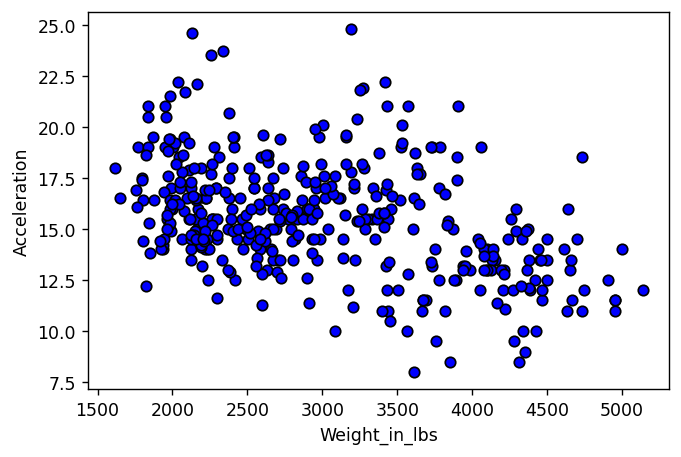

In [7]:
if __name__ == '__main__':
    main()